# Objective
Decision Trees & Random Forests

We are going to predict once again if a passenger on the Titanic is going to survive. This time  using decision trees and random forests: 

1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(at least two parameters). 

4. Calculate the new accuracy and compare it with the previous results. 

5. Use a random forest then change the number of estimators.

6. Calculate the new accuracy and compare it with the previous result.
 

#### 1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree. 

In [1]:
# Preprocessing phase.
import pandas as pd
data = pd.read_csv("data/titanic-passengers.csv",sep =";")
# Head of the Dataset
data.head(2)
#Titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.00,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S


In [2]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [3]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [4]:
data.PassengerId.value_counts()

343    1
138    1
158    1
97     1
283    1
      ..
455    1
529    1
334    1
322    1
428    1
Name: PassengerId, Length: 891, dtype: int64

In [5]:
data.Ticket.value_counts()

CA. 2343      7
1601          7
347082        7
3101295       6
347088        6
             ..
C.A. 34260    1
28213         1
370377        1
347063        1
349215        1
Name: Ticket, Length: 681, dtype: int64

In [6]:
#Preprocessing our data
def preprocess_data(new_data):
    # Fill the Null Value of Age with the Avrage
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    # Fill the Null Value of Embarked with the most Cummon One
    new_data.Embarked.fillna(new_data.Embarked.value_counts().index[0],inplace= True)
    # drop the Value of Cabin, because we have a lot of Null
    new_data.drop(["Cabin"],axis = 1 ,inplace = True)
    # drop Name because not nedded 
    new_data.drop(["Name"],axis = 1 ,inplace = True)
    new_data.drop(["PassengerId"],axis = 1 ,inplace = True)
    # Transform the Value of Sex/Survived from Categorical into Numerical 
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
dataset=preprocess_data(data)

In [7]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,1,28.0,0,0,248740,13.00,S
1,0,3,1,25.0,0,0,348123,7.65,S


In [8]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [10]:
#features extraction
x=dataset.drop(["Survived","Ticket", "Embarked"], axis=1)
#x=dataset.drop(["Survived","Ticket", "Embarked","Pclass","Age","SibSp","Parch","Parch","Fare"], axis=1)
y= dataset["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
treem = tree.DecisionTreeClassifier()  
treem.fit(x_train, y_train)   #fitting our model
y_pred=treem.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.770949720670391


#### 2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

In [11]:
text_representation = tree.export_text(treem)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  2.50
|   |   |   |--- feature_5 <= 26.12
|   |   |   |   |--- feature_2 <= 55.50
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- feature_2 <= 24.50
|   |   |   |   |   |   |   |--- feature_2 <= 23.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_2 >  23.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  24.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |--- feature_5 <= 22.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_5 >  22.00
|   |   |   |   |   |   |   |--- feature_2 <= 43.00
|   |   |   |   |   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_4 >  0.50
|   |   |   |   

In [12]:
with open("data/decision_tree.log", "w") as fout:
    fout.write(text_representation)

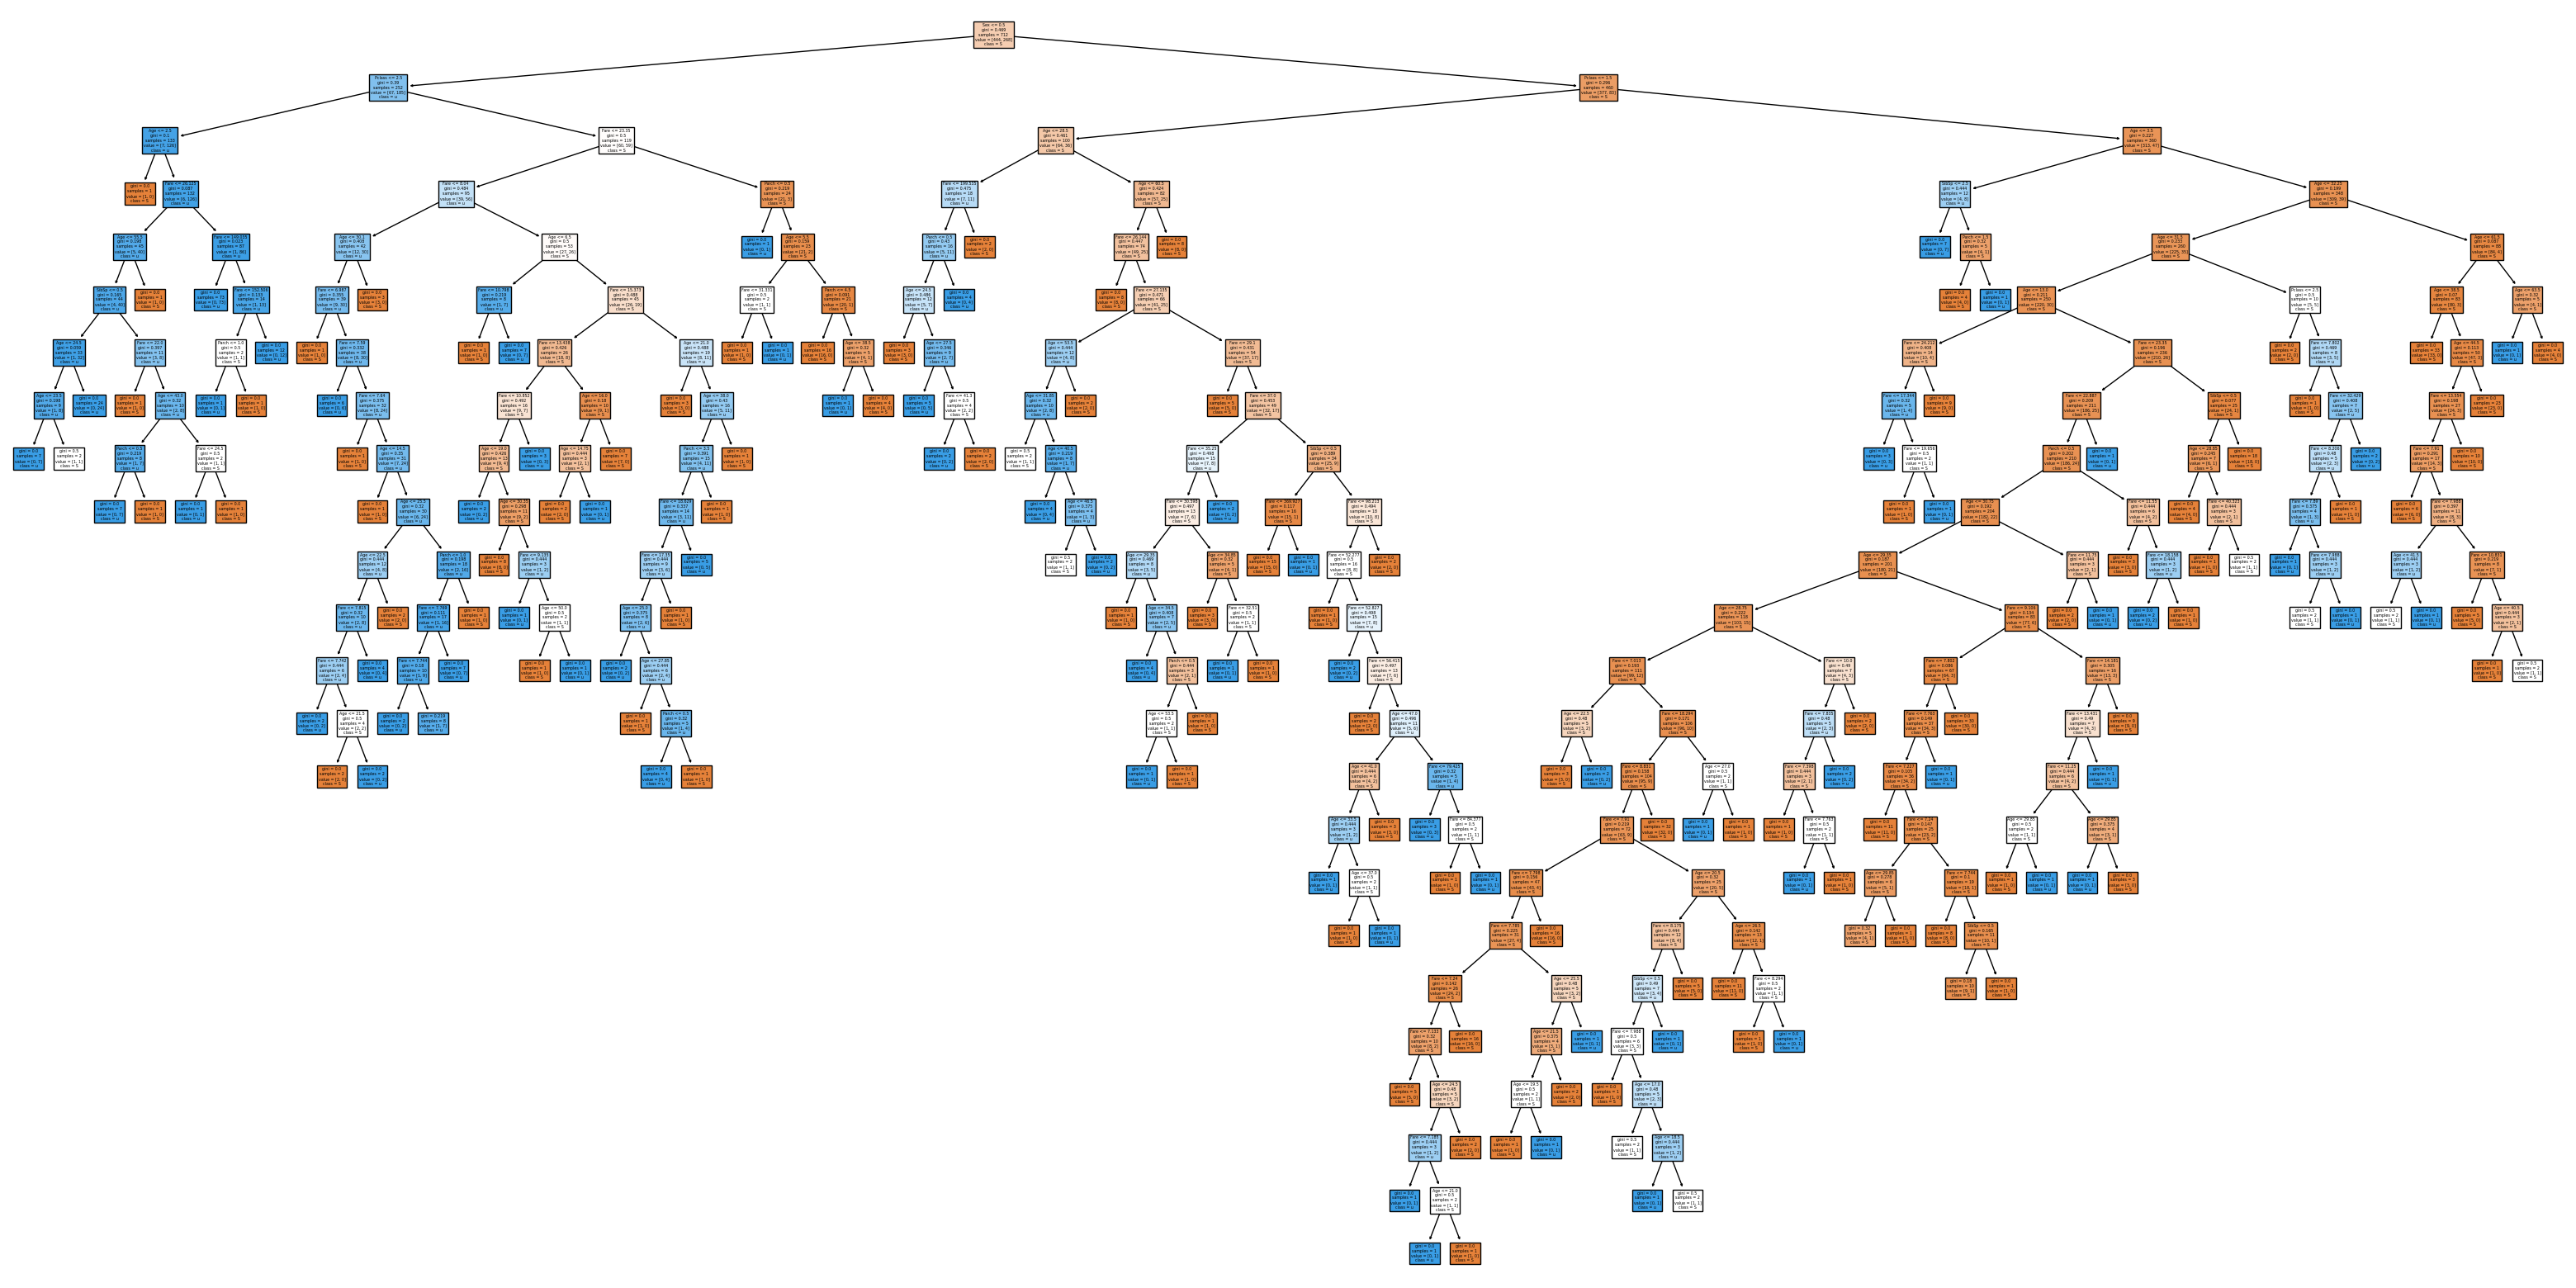

In [13]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(40,20))
_ = tree.plot_tree(treem, feature_names=x.columns,  class_names= "Survived", filled=True)


In [14]:
fig.savefig("data/decision_tree_1.png")

#### 3. Change the decision tree parameters(at least two parameters).  

#### 4. Calculate the new accuracy and compare it with the previous results. 

In [15]:
x.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,2,1,28.0,0,0,13.00
1,3,1,25.0,0,0,7.65


In [16]:
dataset.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,2,1,28.0,0,0,248740,13.00,S
1,0,3,1,25.0,0,0,348123,7.65,S


In [17]:
#features extraction
x =dataset.drop(["Survived","Ticket", "Embarked","Pclass","SibSp","Parch","Fare"], axis=1)
y= dataset["Survived"]

In [18]:
x.head(2)

,Sex,Age
0,1,28.0
1,1,25.0


In [19]:
#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
treem = tree.DecisionTreeClassifier()  
treem.fit(x_train, y_train)   #fitting our model
y_pred=treem.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred))) ### when choosing two variables, the accuracy has deteriorated

score:0.7597765363128491


#### 5. Use a random forest then change the number of estimators.

#### 6. Calculate the new accuracy and compare it with the previous result.

In [20]:
#import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy


x=dataset.drop(["Survived","Ticket", "Embarked"], axis=1)
y= dataset["Survived"] #target

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3) #splitting data with test size of 30%

In [21]:
clf=RandomForestClassifier(n_estimators=10)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8097014925373134


In [22]:
clf=RandomForestClassifier(n_estimators=5)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.8059701492537313


In [23]:
clf=RandomForestClassifier(n_estimators=15)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

Accuracy: 0.832089552238806


In [24]:
clf=RandomForestClassifier(n_estimators=20)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model

## Accuracy has changed

Accuracy: 0.8097014925373134


### some Viz Function

In [25]:
# import graphviz
# # DOT data
# dot_data = tree.export_graphviz(treem, out_file=None, feature_names=x.columns,  class_names= "Survived",filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph


In [26]:
# graph.render("decision_tree_graphivz")

In [27]:
# from dtreeviz.trees import dtreeviz # remember to load the package

# viz = dtreeviz(treem, x, y,target_name = "Survived", feature_names = x.columns, class_names=list(x.columns)) 

# viz

In [28]:
#viz.save("decision_tree.svg")

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# Prepare the data data
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(x_train, y_train)

In [30]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 3.00
|   |   |   |--- value: [0.00]
|   |   |--- feature_2 >  3.00
|   |   |   |--- value: [0.95]
|   |--- feature_0 >  2.50
|   |   |--- feature_5 <= 24.81
|   |   |   |--- value: [0.61]
|   |   |--- feature_5 >  24.81
|   |   |   |--- value: [0.06]
|--- feature_1 >  0.50
|   |--- feature_5 <= 26.27
|   |   |--- feature_2 <= 13.50
|   |   |   |--- value: [0.83]
|   |   |--- feature_2 >  13.50
|   |   |   |--- value: [0.11]
|   |--- feature_5 >  26.27
|   |   |--- feature_3 <= 1.50
|   |   |   |--- value: [0.40]
|   |   |--- feature_3 >  1.50
|   |   |   |--- value: [0.06]



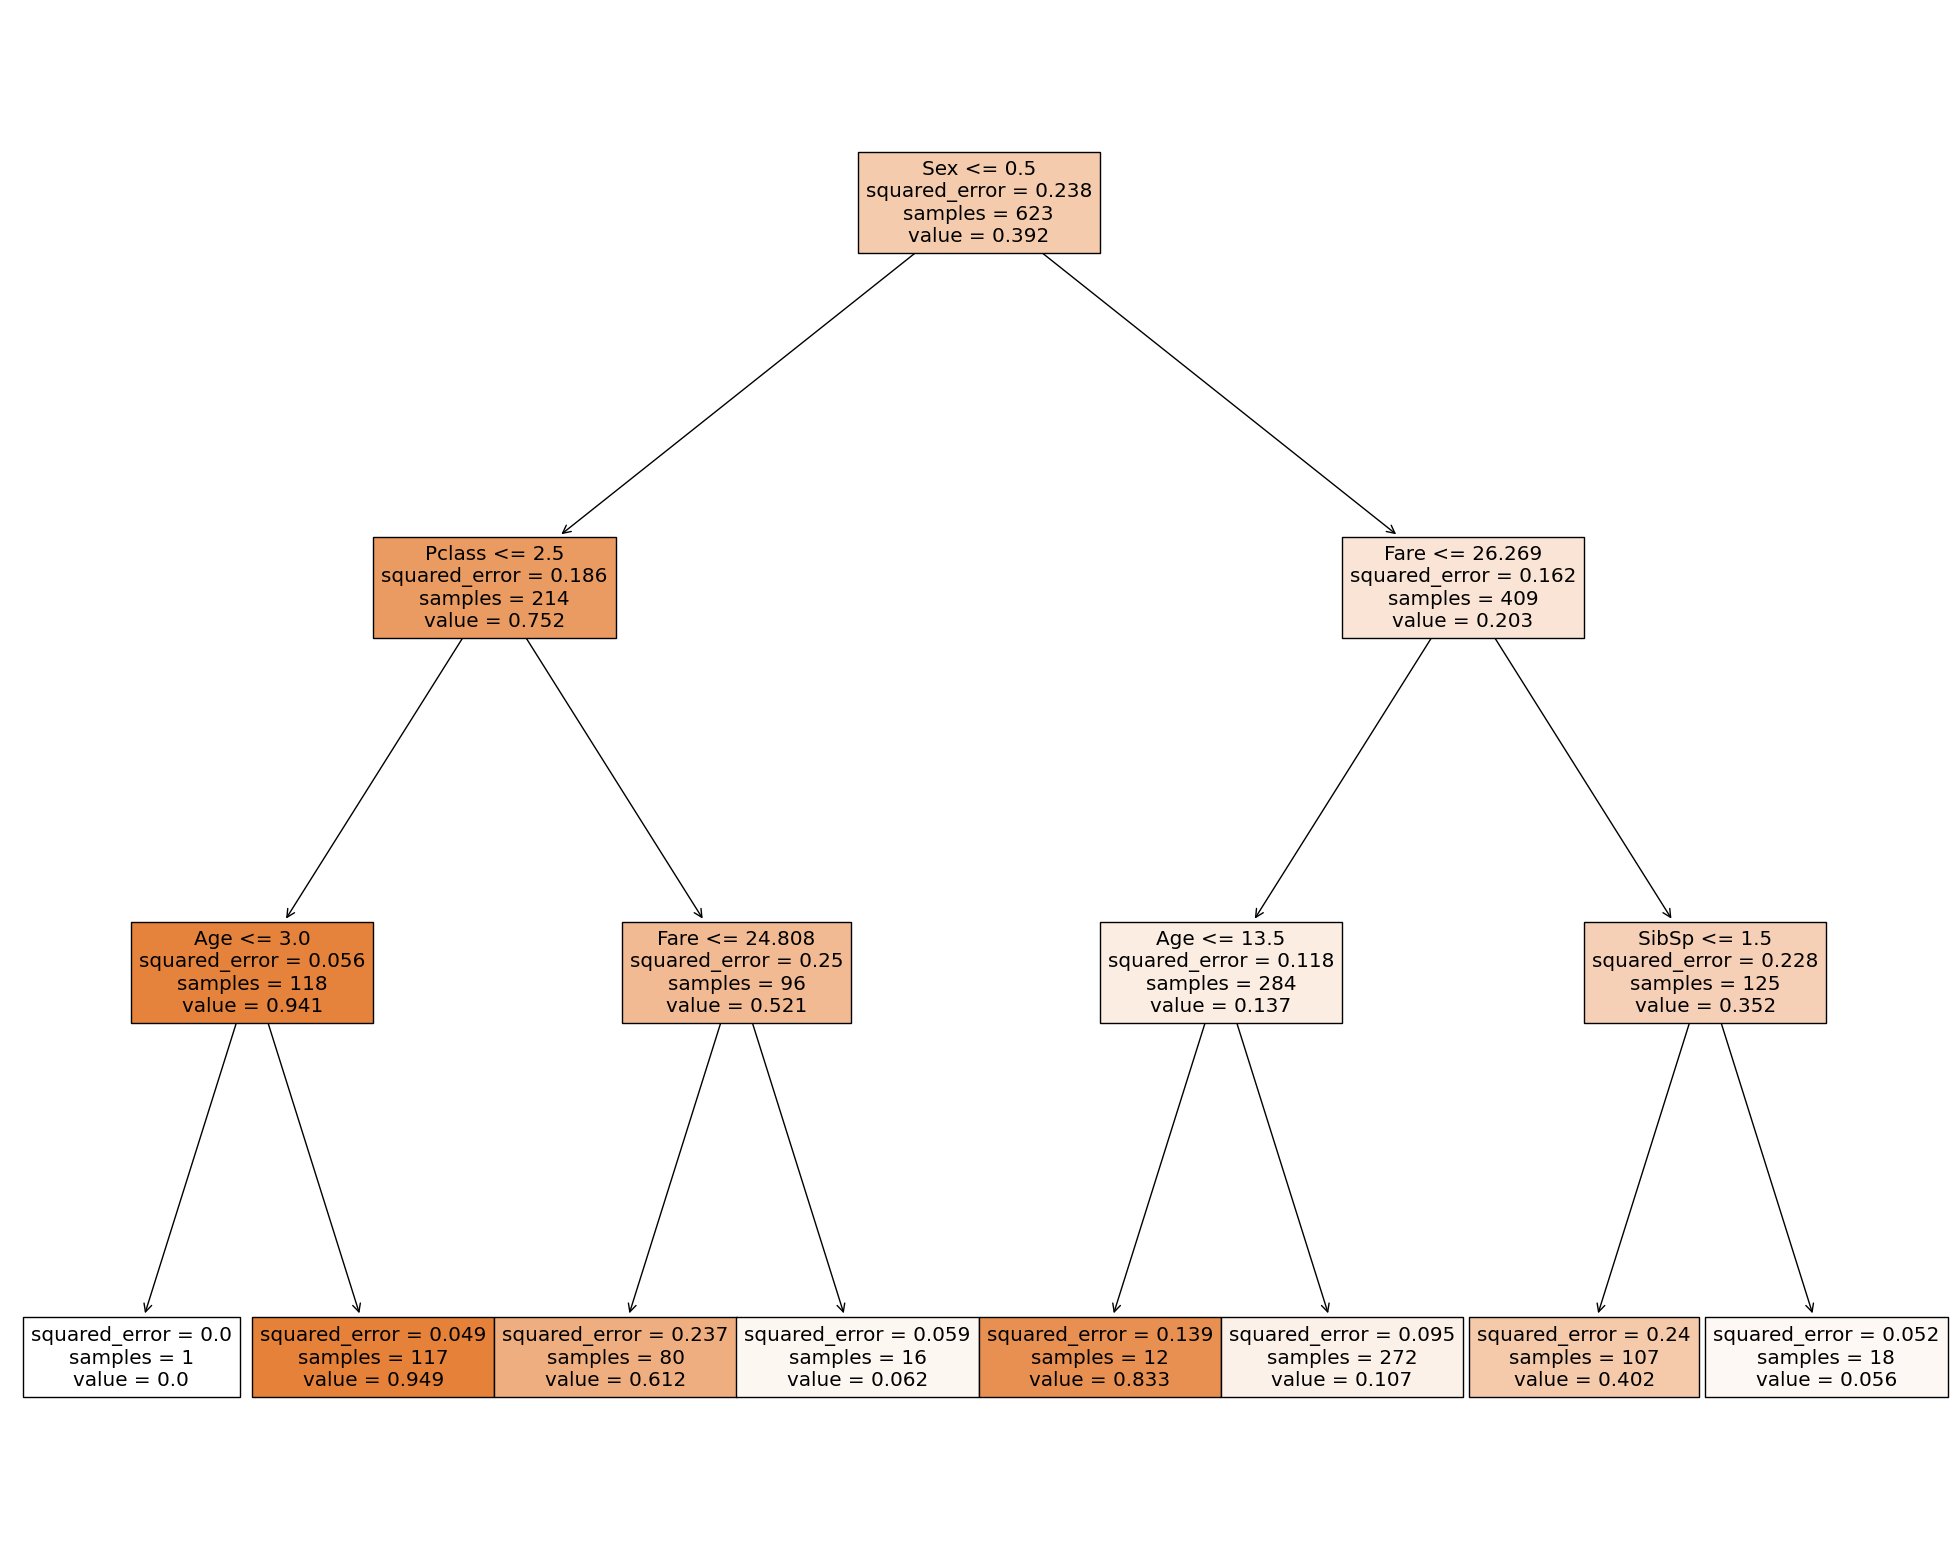

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=x.columns, filled=True)

In [32]:
fig.savefig("data/decision_tree_2.png")

In [33]:
# dot_data = tree.export_graphviz(regr, out_file=None, 
#                                 feature_names=x.columns,  
#                                 filled=True)
# graphviz.Source(dot_data, format="png") 

In [34]:
# from dtreeviz.trees import dtreeviz # remember to load the package

# viz = dtreeviz(regr, x, y,
#                 target_name="Survived",
#                 feature_names=x.columns)
# viz